#Cargar las librerías necesarias y look

In [ ]:
# Cargar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de gráficos
sns.set(style="whitegrid")

#Cargar y explorar el Dataset

In [ ]:
# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convertir a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Ver las primeras filas y la distribución de la variable objetivo
print(df.head())
print(df['target'].value_counts())

# Revisión de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

#División del Dataset

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")

Tamaño de entrenamiento: (455, 30), Tamaño de prueba: (114, 30)


#Entrenamiento de los modelos

##Modelo Supervisado (Support Vector Machine)

In [ ]:
# Entrenar modelo SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

##Modelo de Regresión Logística

In [ ]:
# Entrenar modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

##Modelo No Supervisado (K-Means)

In [ ]:
# Entrenar modelo de K-means
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train)
y_pred_kmeans = kmeans_model.predict(X_test)

#Evaluación de los Modelos

##Evaluación con métricas supervisadas para SVM

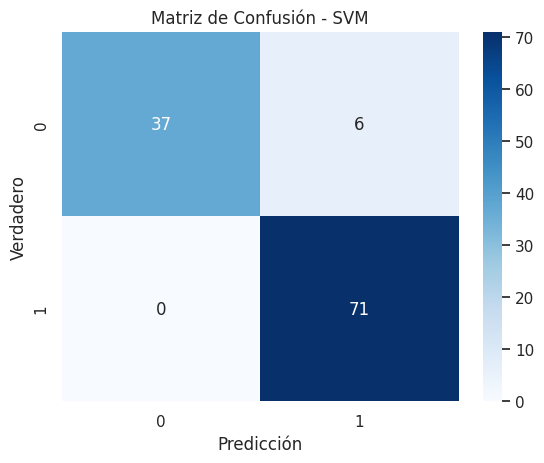

Exactitud (SVM): 0.95
Precisión (SVM): 0.92
Exhaustividad (SVM): 1.00
F1 Score (SVM): 0.96


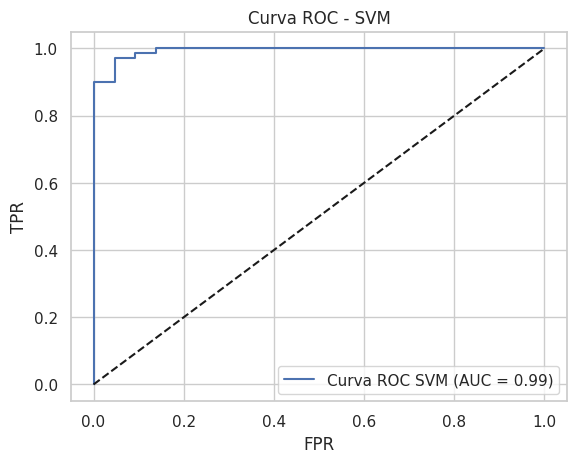

In [ ]:
# Matriz de confusión - SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# Cálculo de otras métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Exactitud (SVM): {accuracy_svm:.2f}")
print(f"Precisión (SVM): {precision_svm:.2f}")
print(f"Exhaustividad (SVM): {recall_svm:.2f}")
print(f"F1 Score (SVM): {f1_svm:.2f}")

# Curva ROC y AUC
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, label=f"Curva ROC SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC - SVM")
plt.legend()
plt.show()

##Evaluación con métricas supervisadas para Regresión Logística

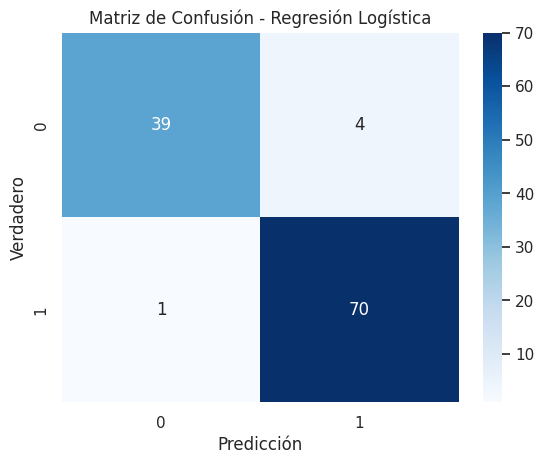

Exactitud (Regresión Logística): 0.96
Precisión (Regresión Logística): 0.95
Exhaustividad (Regresión Logística): 0.99
F1 Score (Regresión Logística): 0.97


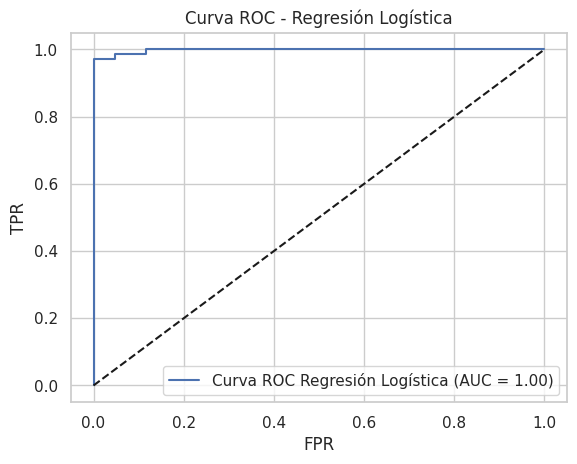

In [ ]:
# Matriz de confusión - Regresión Logística
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# Cálculo de otras métricas
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print(f"Exactitud (Regresión Logística): {accuracy_logistic:.2f}")
print(f"Precisión (Regresión Logística): {precision_logistic:.2f}")
print(f"Exhaustividad (Regresión Logística): {recall_logistic:.2f}")
print(f"F1 Score (Regresión Logística): {f1_logistic:.2f}")

# Curva ROC y AUC
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.plot(fpr_logistic, tpr_logistic, label=f"Curva ROC Regresión Logística (AUC = {roc_auc_logistic:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()

##Evaluación con métricas no supervisadas para K-Means

In [ ]:
# Evaluación no supervisada
# Inercia: medida de la suma de distancias cuadradas dentro de cada clúster
inertia = kmeans_model.inertia_
print(f"Inercia: {inertia:.2f}")

# Coeficiente de Silueta: mide la cohesión y separación de los clústeres
silhouette_avg = silhouette_score(X_test, y_pred_kmeans)
print(f"Coeficiente de Silueta: {silhouette_avg:.2f}")

Inercia: 62478986.46
Coeficiente de Silueta: 0.68
